In [127]:
import gym
import minihack
import matplotlib.pyplot as plt
import numpy as np

env = gym.make(
    "MiniHack-KeyRoom-S5-v0",
    observation_keys=(
        "pixel",
        "pixel_crop",
        "chars",
        "chars_crop",
        "message",
        "blstats",
        "screen_descriptions",
    ),
    max_episode_steps=100,
    seeds=[0],
    # num_envs=3,
    # asynchronous=True
)

/home/uceeepi/miniforge3/envs/lfrl/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (21, 79)
  logger.warn(
/home/uceeepi/miniforge3/envs/lfrl/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (9, 9)
  logger.warn(
/home/uceeepi/miniforge3/envs/lfrl/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:25: UserWarning: WARN: It seems a Box observation space is an image but the upper and lower bounds are not in [0, 255]. Generally, CNN policies assume obs

In [168]:
a = {"a": "b\n\nc"}
from pprint import pprint
print(a)
print(str(a).encode().decode("unicode_escape"))

{'a': 'b\n\nc'}
{'a': 'b

c'}


(-0.5, 143.5, 143.5, -0.5)

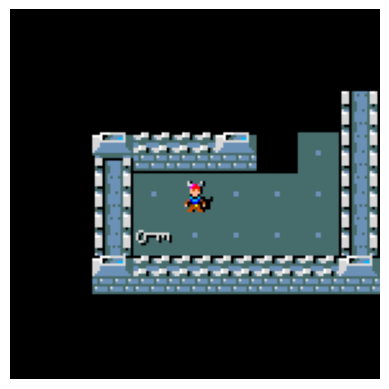

In [128]:
obs, info = env.reset(seed=0)

image = obs["pixel_crop"]
plt.imshow(image)
plt.axis(False)

In [22]:
def decode_observation(obs) -> str:
    rows, cols = obs.shape
    result = ""
    for i in range(rows):
        result += "\n" + "".join(map(chr, obs[i]))
    return result
key = decode_observation(obs["chars_crop"])

a = {}
a[key] = 1
print(a)

{'\n         \n         \n        |\n  --+- .|\n  |.@...|\n  |.....|\n  -------\n         \n         ': 1}


In [13]:
for i in range(0, 5):
    obs, info = env.reset(seed=i)
    print(env.env.get_seeds())
    env.render()
    obs, info = env.env.reset(seed=i)
    print(env.get_seeds())
    env.render()

(0, 0, False)

Be careful!  New moon tonight.                                                  
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                          |                                     
             

In [169]:
import jax
import jax.numpy as jnp

key = jax.random.PRNGKey(0)

@jax.jit
def f(x):
    return jax.random.randint(key, (5,), minval=0, maxval=x)

y = jnp.asarray(2)
x = jax.lax.cond(y == jnp.asarray(1), lambda: jnp.asarray(2), lambda: jnp.asarray(10))

f(x)

Array([8, 1, 3, 8, 8], dtype=int32)

In [170]:
jnp.arange(1)

Array([0], dtype=int32)

In [162]:
import jax
import jax.numpy as jnp

def redistribute_rewards(pytree):
    rewards = pytree["reward"]
    times = pytree["time"]
    
    reward_mask = jnp.cumsum(rewards[::-1])[::-1]
    time_mask = jnp.cumsum(times == 0)
    # print(reward_mask, time_mask)
    
    for i in jnp.unique(time_mask):
        episode_mask = time_mask == i
        print(episode_mask)
        r = rewards * (episode_mask)
        rewards = jnp.where(episode_mask, r.sum() / sum(episode_mask), rewards)
    return rewards
    
# Example usage
pytree = {"reward": jnp.asarray([0, 1, 0, 0, 0, 0, 0, 0, 0]), 
          "time": jnp.asarray([4, 5, 0, 1, 2, 3, 0, 1, 2]),
          "term": jnp.asarray([0, 1, 0, 0, 0, 1, 0, 0, 0])}

# pytree = {"reward": jnp.asarray([1, 0, 0, 0, 0, 0, 0, 0, 0]), 
#           "time": jnp.asarray([4, 5, 0, 1, 2, 3, 0, 1, 2])}

# pytree = {"reward": jnp.asarray([0, 0, 0, 0, 0, 0, 0, 0, 1]), 
#           "time": jnp.asarray([4, 5, 0, 1, 2, 3, 0, 1, 2])}

# pytree = {"reward": jnp.asarray([0, 0, 0, 0, 0, 0, 0, 0, 1]), 
#           "time": jnp.asarray([4, 5, 0, 1, 2, 3, 0, 1, 2])}

# pytree = {"reward": jnp.asarray([0, 0, 0, 0, 0, 0, 0, 0, 1]), 
#           "time": jnp.asarray([4, 5, 0, 1, 2, 3, 0, 1, 2])}

print(redistribute_rewards(pytree))

[ True  True False False False False False False False]
[False False  True  True  True  True False False False]
[False False False False False False  True  True  True]
[0.5 0.5 0.  0.  0.  0.  0.  0.  0. ]


In [36]:
import os
import pickle
from calf.io import load_pickle_minibatches, load_pickle_stream

In [2]:
path = "/scratch/uceeepi/calf/experiment_2/ann_full.pkl"
stream = load_pickle_stream(path)

In [17]:
for annotation in stream[:100]:
    for key in annotation.parsed:
        obs, action = key
        if int(action) == 4 or int(action) == 5:
            print(str(key).encode().decode("unicode_escape"), annotation.parsed[key])

('
                                                                                                                                                             
                                                                                                                                                             
                                                                                                                                                             
                                                                                                                                                             
                                                                                                                                                             
                                                                                                                                                             
                                                 